## Loading modules:

In [1]:
import pandas as pd
from yahoo_finance import Share
import matplotlib.pyplot as plt
import numpy as np
import requests
import re
plt.style.use('ggplot')
import seaborn as sns
import matplotlib
%matplotlib inline

## Loading Dataset:

In [2]:
# Download the file from `url` and save it locally under `file_name`:
url = "http://puu.sh/oBCfW/c006093339.xlsx"
file_name = "./IPO_Expanded_Multiprocessing_d.xlsx"

req = requests.get(url)
file = open(file_name, 'wb')
for chunk in req.iter_content(100000):
    file.write(chunk)
file.close()

In [3]:
my_data = pd.read_excel(file_name,sheetname="Nasdaq_IPO_Expanded_Multiproces")

In [4]:
my_data.head(3)

,Company Name,Symbol,Market,Initial Price,Initial Shares,Offer Amount,IPO Date,Current Price,Industry,Sector,Current Beta,First Day Open Price,First Day High Price,First Day Low Price,First Day Close Price,First Day Volume,Thirty Days Later Date,Thirty Days Later Close Price,One Year Later Date,One Year Later Close Price
0,SECUREWORKS CORP,SCWX,NASDAQ,14.0,8000000,1.120000e+08,2016-04-22,13.33,IT Services & Consulting - NEC,Technology,NaN,13.89,14.6,13.4,14.00,7986552,2016-04-29,13.33,2016-04-04,13.33
1,"AMERICAN RENAL ASSOCIATES HOLDINGS, INC.",ARA,New York Stock Exchange,22.0,7500000,1.650000e+08,2016-04-21,28.12,Healthcare Facilities & Services - NEC,Healthcare,NaN,26.5,27.4,26,26.50,4979102,2016-04-28,27.50,2016-04-04,27.50
2,MGM GROWTH PROPERTIES LLC,MGP,New York Stock Exchange,21.0,50000000,1.050000e+09,2016-04-20,22.07,Hospitality REITs,Financials,NaN,22.75,22.88,21.92,22.01,29591485,2016-04-28,22.26,2016-04-04,22.26


## Cleaning Data

In [5]:
df = my_data.copy()
## These symbols were not available 
df = df[df.Symbol != "GAV'U"]
df = df[df.Symbol != "AGR'A"]
df = df[df.Symbol != "TAP'A"]
df = df[df.Symbol != "PED'U"]

df.shape

(4846, 20)

In [6]:
df["First Day Open Price"] = df["First Day Open Price"].replace("-",np.nan).astype('float')
df= df[df["First Day Open Price"]<200]
df.shape

(2171, 20)

In [7]:
df.Sector.replace(to_replace="&amp;",value="",regex=True,inplace=True) 

## Calculating New Parameters

In [8]:
df["Day_Closing"] = 100 * (df["First Day Open Price"] - df["First Day Close Price"])/(df["First Day Open Price"])
df["Day30_closing"] = 100 *(df["First Day Open Price"] - df["Thirty Days Later Close Price"])/(df["First Day Open Price"])
df["Current_closing"] = 100 * (df["First Day Open Price"] - df["Current Price"])/(df["First Day Open Price"])

a = {}
b = []
for i in df.Symbol:
    try:
        x = Share(i).get_price()
        if x == None:
            b.append(i)
        else:
            a[i] = x
    except:
        print(i)

# Data Visualization

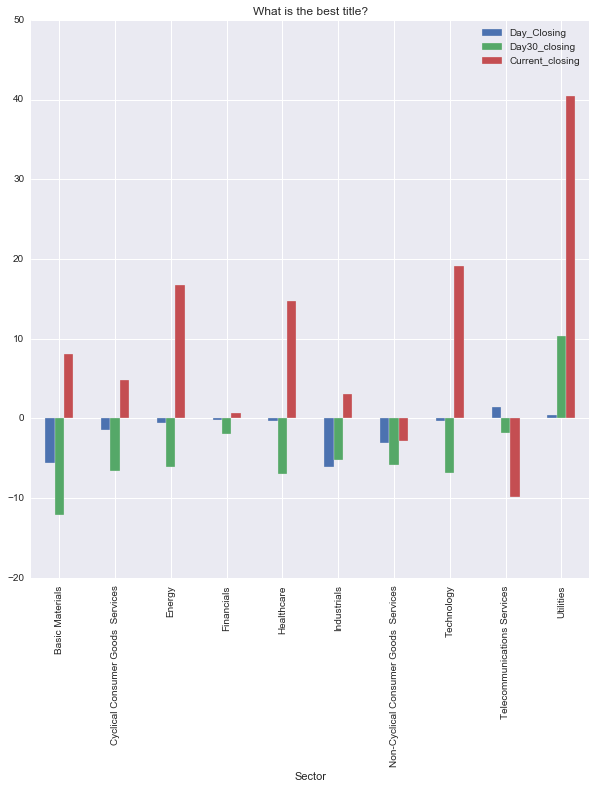

In [9]:
df_graph1 = df[["Day_Closing","Day30_closing",
    "Current_closing"]].groupby(df["Sector"]).mean()
df_graph1['index1'] = df_graph1.index
df_graph1.reset_index(drop=True)
df_graph1.plot(kind = "bar",title = "What is the best title?",
               figsize=(10,10),subplots=False,legend = True)

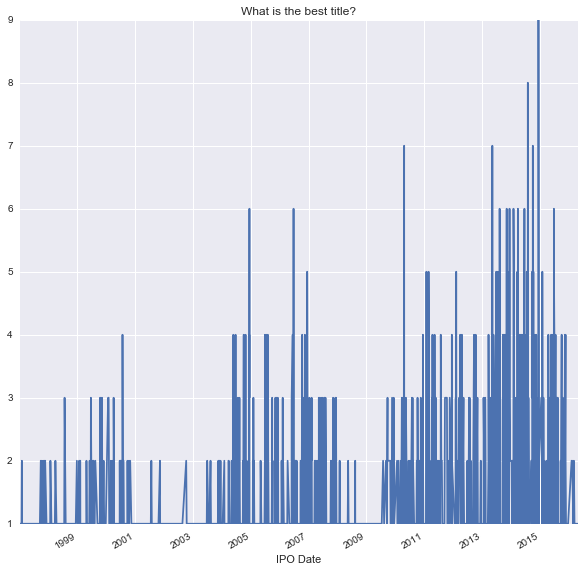

In [10]:
plt.figure();
df.Symbol.groupby(df["IPO Date"]).count().plot(title = "What is the best title?",
               figsize=(10,10))


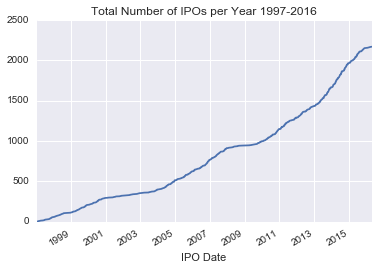

In [11]:
df_graph2 = df["First Day Close Price"].groupby(df["IPO Date"]).count()
df_graph2 = pd.DataFrame(df_graph2)
df_graph2['index1'] = df_graph2.index
#df_graph2 = df_graph2.reset_index(drop = True)
df_graph2.columns = ["Number","IPO Date"]
df_graph2["Number"].cumsum().plot(title = "Total Number of IPOs per Year 1997-2016")

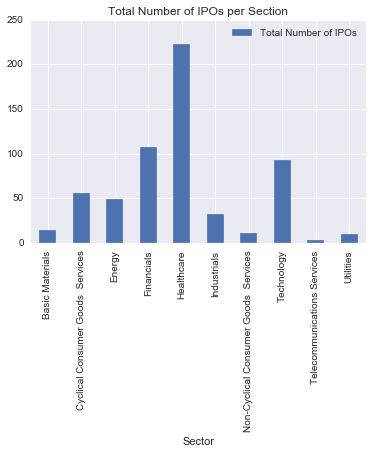

In [27]:
df_graph3 = df.groupby(["Sector"]).count()

df_graph3 = df_graph3.reset_index()
df_graph3.index = df_graph3["Sector"]

df_graph3 = df_graph3[["Symbol"]]
df_graph3.columns = ["Total Number of IPOs"]
df_graph3.plot(kind="bar",title = "Total Number of IPOs per Section")

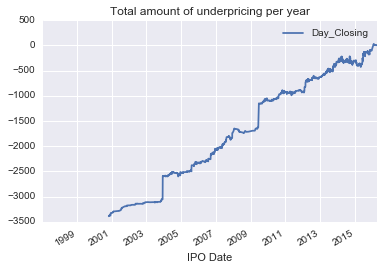

In [101]:


df_graph5 = df[["Day_Closing","Day30_closing","Current_closing","IPO Date"]]

df_graph5.index = df_graph5["IPO Date"]
del df_graph5["IPO Date"]

df_graph5[["Day_Closing"]].cumsum().plot(title = "Total amount of underpricing per year")
